# Trabalhando com Funções

In [6]:
import math # Biblioteca matemática usada para contas
import matplotlib.pyplot as plt # Plots em python
import numpy as np # Biblioteca matemática usada para contas (Também trabalha com vetores, bem mais completa)

In [7]:
def get_Qg(T):
    return (deltaH_neg*v*q*Cf*k0*np.exp(-E/(R*T)))/(q + v*k0*np.exp(-E/(R*T)))

#### Parâmetros

In [8]:
q: float = 0.1
v: float = 0.1
k0: float = 9703*3600
deltaH_neg: float = 5960
E: float = 11843
Cp: float = 500
hA: float = 15
R: float = 1.987
Tcf: float = 298.5
Tf: float = 298.15
Cf: float = 10

### Trabalhando com Loops

Utilizamos for para realização de loops em python

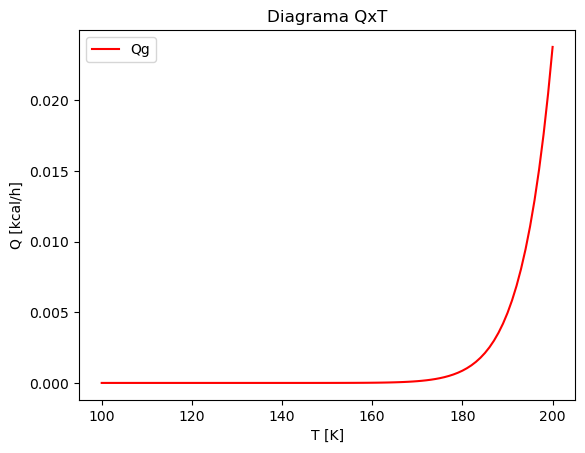

In [9]:
T = [value for value in range(201) if value >= 100 and value <=200]

Qg = []

for temperature in T:
    Qg.append(get_Qg(temperature))

# Como plotar gráficos em python

fig, ax = plt.subplots()
qg = ax.plot(T, Qg, 'r', label = 'Qg')
plt.title('Diagrama QxT')
plt.xlabel('T [K]')
plt.ylabel('Q [kcal/h]')
plt.legend()
plt.show()

# Resolvendo EDOs simples

In [10]:
from scipy.integrate import odeint

In [11]:
def dSdt(S, t):
    C, T = S
    dCdt = q * Cf / v - C * (k0 * math.exp(-E / (R * T)) + q / v)
    dTdt = q * Tf / v + deltaH_neg * k0 * C * \
        math.exp(-E / (R * T)) / Cp + hA * Tcf / \
        (v * Cp) - T * (q / v + hA / (v * Cp))
    return [dCdt, dTdt]

t = np.linspace(0,1,100)
S0 = [0,300]

sol = odeint(dSdt,S0,t)

C_plot = sol[:, 0]
T_plot = sol[:, 1]


### Plotando Temperatura

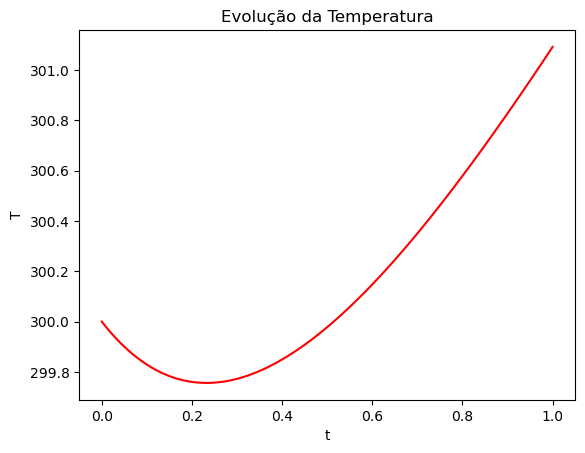

In [12]:
plt.plot(t, T_plot, 'r')
plt.title('Evolução da Temperatura')
plt.xlabel('t')
plt.ylabel('T')
plt.show()

### Plotando Concentração

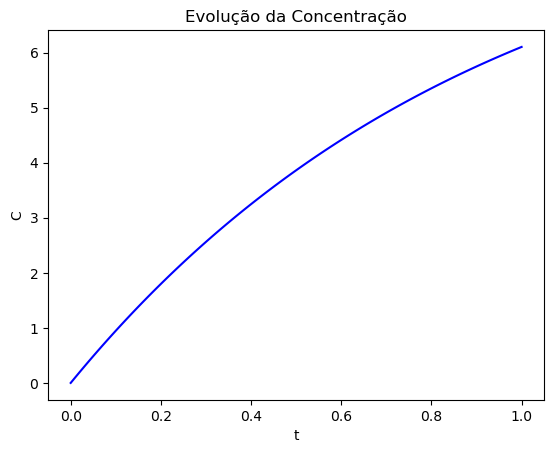

In [13]:
plt.plot(t, C_plot, 'b')
plt.title('Evolução da Concentração')
plt.xlabel('t')
plt.ylabel('C')
plt.show()

### Reator Batelada com reação química irreversíveis de 1ª ordem em série

#### Parâmetros

In [33]:
k1 = 2.5
k2 = 0.9

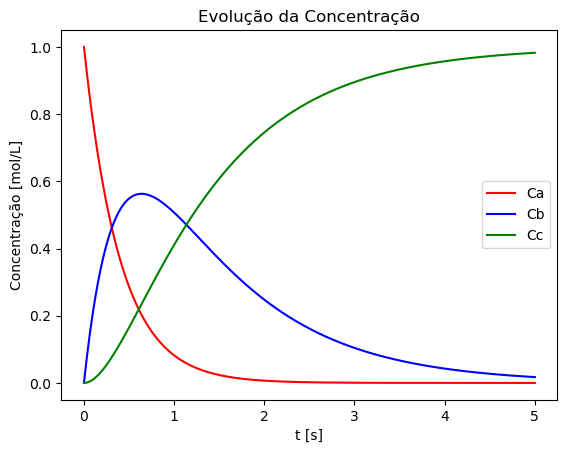

In [37]:
def dCdt(C, t):
    Ca, Cb, Cc = C
    dCadt = -k1*Ca
    dCbdt = k1*Ca - k2*Cb
    dCcdt = k2*Cb
    return [dCadt, dCbdt, dCcdt]

t = np.linspace(0,5,500)
C0 = [1, 0, 0]

sol = odeint(dCdt,C0,t)

Ca_plot = sol[:, 0]
Cb_plot = sol[:, 1]
Cc_plot = sol[:, 2]

fig, ax = plt.subplots()
ca, cb, cc = ax.plot(t, Ca_plot, 'r', t, Cb_plot, 'b', t, Cc_plot, 'g')
ca.set_label('Ca')
cb.set_label('Cb')
cc.set_label("Cc")
plt.title('Evolução da Concentração')
plt.xlabel('t [s]')
plt.ylabel('Concentração [mol/L]')
plt.legend()
plt.show()

In [52]:
Cbmax = max(Cb_plot)
Cbmax_index = list(Cb_plot).index(Cbmax)
print("O valor máximo obtido para Cb é de:", round(Cbmax,2), "mol/L")
print("O valor máximo obtido para Cb é atingido em", Cbmax_index, "segundos")

O valor máximo obtido para Cb é de: 0.56 mol/L
O valor máximo obtido para Cb é atingido em 64 segundos
